In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

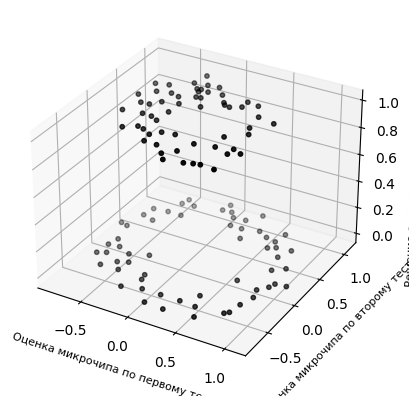

In [ ]:
# 2.1 визуализация данных

path = 'ex2data2.txt'
df = pd.read_csv(path, header=None,
                 names=['Оценка микрочипа по первому тесту', 'Оценка микрочипа по второму тесту', 'Решение о соответствии характеристикам'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Оценка микрочипа по первому тесту'], df['Оценка микрочипа по второму тесту'], df['Решение о соответствии характеристикам'], c='black', s=10)
ax.set_xlabel('Оценка микрочипа по первому тесту', fontsize=8)
ax.set_ylabel('Оценка микрочипа по второму тесту', fontsize=8)
ax.set_zlabel('Решение о соответствии характеристикам', fontsize=8)

plt.show()

In [ ]:
# 2.2 создание вектора признаков

# задание матрицы X0 (первый столбец содержит единицы, второй и третий - признаки)
X0 = np.ones((df['Оценка микрочипа по первому тесту'].size, 3))
X0[:, 1] = df['Оценка микрочипа по первому тесту'].values
X0[:, 2] = df['Оценка микрочипа по второму тесту'].values

# вектор выходных данных
y = np.array(df['Решение о соответствии характеристикам']).reshape(-1, 1)

max_degree = 30
X_strike = np.column_stack([X0[:, 1] ** i * X0[:, 2] ** (degree - i)
                            for degree in range(max_degree + 1)
                            for i in range(degree + 1)])

In [ ]:
# 2.3 разбиение данных на тренировочную и тестовую выборки в соотношении 80/20

idx = np.arange(len(X_strike))
np.random.shuffle(idx)
split_idx = int(0.8 * len(X_strike))

X_train, X_test = X_strike[idx[:split_idx]], X_strike[idx[split_idx:]]
y_train, y_test = y[idx[:split_idx]], y[idx[split_idx:]]

In [ ]:
# задание гипотезы


def g(z):
    return np.exp(z) / (1 + np.exp(z))


def h_θ(θ, X):
    return g(np.dot(X, θ))

In [ ]:
# 2.4 реализация регуляризованной функции потерь

ε = 1e-10


def L(θ, λ, X, y):
    loss = 0

    for i in range(X.shape[0]):
        loss -= (y[i, 0] * np.log(h_θ(θ, X[i]) + ε) + (1 - y[i, 0]) * np.log(1 - h_θ(θ, X[i]) + ε)) / X.shape[0]

    for i in range(X.shape[1]):
        loss += λ * θ[i] ** 2 / (2 * X.shape[0])

    return loss

In [ ]:
# задание скорости обучения
α = 0.5

# задание числа итераций
iterations_num = 30000

In [ ]:
# 2.5 реализация градиентного спуска с регуляризацией

def grad(θ, λ, X, y):
    grad = np.zeros(X.shape[1])

    for i in range(X.shape[0]):
        grad += (h_θ(θ, X[i]) - y[i, 0]) * X[i]

    grad += θ * λ

    return grad

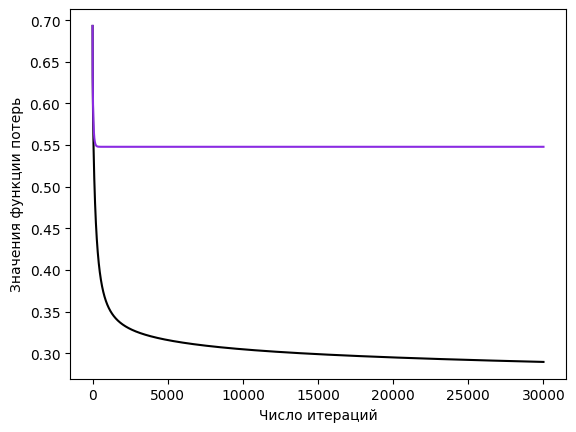

In [ ]:
# а.)
loss_1 = []
θ_updated_1 = np.zeros(X_train.shape[1]).T

for i in range(iterations_num):
    loss_1.append(L(θ_updated_1, 0.0, X_train, y_train))
    θ_updated_1 -= α / X_train.shape[0] * grad(θ_updated_1, 0.0, X_train, y_train)

plt.plot(loss_1, c='black')

# б.)
loss_2 = []
θ_updated_2 = np.zeros(X_train.shape[1]).T

for i in range(iterations_num):
    loss_2.append(L(θ_updated_2, 1.0, X_train, y_train))
    θ_updated_2 -= α / X_train.shape[0] * grad(θ_updated_2, 1.0, X_train, y_train)

plt.plot(loss_2, c='blueviolet')

plt.xlabel('Число итераций')
plt.ylabel('Значения функции потерь')
plt.show()

In [ ]:
# 2.6 расчет точности на тренировочной и тестовой выборках
# сравнение того, как изменились точности с регуляризацией и без нее.

# точность = (количество правильно классифицированных примеров) / (размер выборки)

y_pred_train_without = np.round(h_θ(θ_updated_1, X_train))
num_correct = 0
for i in range(len(y_train)):
    if y_pred_train_without[i] == y_train[i]:
        num_correct += 1

accuracy = num_correct / X_train.shape[0]
print('точность на тренировочной выборке без регуляризации: ', accuracy)

y_pred_train_with = np.round(h_θ(θ_updated_2, X_train))
num_correct = 0
for i in range(len(y_train)):
    if y_pred_train_with[i] == y_train[i]:
        num_correct += 1

accuracy = num_correct / X_train.shape[0]
print('точность на тренировочной выборке с регуляризацией: ', accuracy)

точность на тренировочной выборке без регуляризации:  0.8829787234042553
точность на тренировочной выборке с регуляризацией:  0.8191489361702128


In [ ]:
y_pred_test_without = np.round(h_θ(θ_updated_1, X_test))
num_correct = 0
for i in range(len(y_test)):
    if y_pred_test_without[i] == y_test[i]:
        num_correct += 1

accuracy = num_correct / X_test.shape[0]
print('точность на тестовой выборке без регуляризации: ', accuracy)

y_pred_test_with = np.round(h_θ(θ_updated_2, X_test))
num_correct = 0
for i in range(len(y_test)):
    if y_pred_test_with[i] == y_test[i]:
        num_correct += 1

accuracy = num_correct / X_test.shape[0]
print('точность на тестовой выборке с регуляризацией: ', accuracy)

точность на тестовой выборке без регуляризации:  0.7916666666666666
точность на тестовой выборке с регуляризацией:  0.875


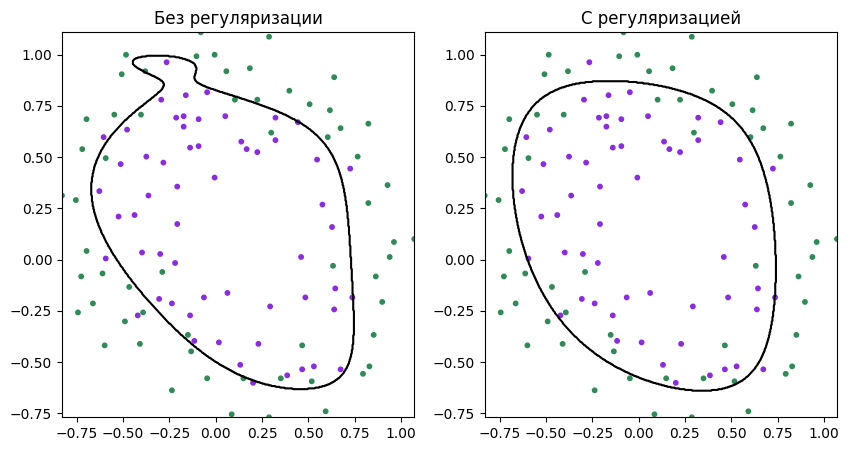

In [ ]:
# 2.7 построение границы принятия решения

x_grid, y_grid = np.meshgrid(np.linspace(np.array(df)[:, 0].min(), np.array(df)[:, 0].max(), 500),
                              np.linspace(np.array(df)[:, 1].min(), np.array(df)[:, 1].max(), 500))

gen_grid = np.column_stack([x_grid.ravel() ** i * y_grid.ravel() ** (degree - i)
                            for degree in range(max_degree + 1)
                            for i in range(degree + 1)])

threshold = 0.45
without_reg = (h_θ(θ_updated_1, gen_grid).reshape(500, 500) > 0.5).astype(int)
with_reg = (h_θ(θ_updated_2, gen_grid).reshape(500, 500) > 0.5).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].contour(without_reg, levels=[threshold], colors='black', extent=(np.array(df)[:, 0].min(), np.array(df)[:, 0].max(), np.array(df)[:, 1].min(), np.array(df)[:, 1].max()))
colors = ['seagreen', 'blueviolet']
axs[0].scatter(np.array(df)[:, 0], np.array(df)[:, 1], c=[colors[i] for i in y.squeeze()], s=10)
axs[0].set_title('Без регуляризации')

axs[1].contour(with_reg, levels=[threshold], colors='black', extent=(np.array(df)[:, 0].min(), np.array(df)[:, 0].max(), np.array(df)[:, 1].min(), np.array(df)[:, 1].max()))
colors = ['seagreen', 'blueviolet']
axs[1].scatter(np.array(df)[:, 0], np.array(df)[:, 1], c=[colors[i] for i in y.squeeze()], s=10)
axs[1].set_title('С регуляризацией')

plt.show()